In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [175]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(15,7))

# スタイルの指定
#plt.style.use('science')
#plt.style.use(['science', 'grid'])
#plt.style.use(['science', 'notebook'])
#plt.style.use(['science', 'ieee'])
#plt.style.use(['science', 'nature'])
#plt.style.use(['science','no-latex'])

In [3]:
df = pd.read_excel('Participants_Listt.xlsx')

In [4]:
df.describe()

,種別,業種 Industry,Experience in Africa,Expectations,Information from
count,247,210,243,247,234
unique,2,57,45,22,31
top,個人 Individual,コンサルティング Consulting,アフリカビジネスの可能性を考え始めたばかり Just starting to think a...,アフリカビジネスの最新情報の入手 New information about African...,知人からの紹介 From your friends
freq,134,32,57,78,49


In [5]:
df['種別'].unique()

array(['個人 Individual', '法人・組織 Company/ Organization'], dtype=object)

In [6]:
# missing values
df = df.fillna(method="ffill") 

In [119]:
df.head(20-40)

,種別,業種 Industry,Experience in Africa,Expectations,Information from
0,個人 Individual,教育関係 Education,すでにアフリカでビジネスを展開している We have already started bu...,アフリカンとのネットワーキング Networking with africans,ADNJ からのメール Email from ADNJ
1,個人 Individual,保健関係 Health,現在アフリカビジネス調査中である We are under the reserch,ビジネスアイデア Business ideas,ADNJ からのメール Email from ADNJ
2,個人 Individual,コンサルティング Consulting,アフリカビジネスは開始していないがその他地域への海外展開をしている Not yet in A...,ビジネスアイデア Business ideas,イベント関係者からの紹介 From one of the organizers
3,個人 Individual,出版社・メディア Media / Magazine,海外展開の可能性を考え始めたばかりで地域は限定していない We are just sta...,アフリカンとのネットワーキング Networking with africans,ADNJ からのメール Email from ADNJ
4,法人・組織 Company/ Organization,"農林水産業 Agriculture, Forestry and Fisheries",アフリカビジネスは開始していないがその他地域への海外展開をしている Not yet in A...,アフリカビジネスの最新情報の入手 New information about African...,ADNJ からのメール Email from ADNJ
...,...,...,...,...,...
222,個人 Individual,"農林水産業 Agriculture, Forestry and Fisheries",現在アフリカビジネス調査中である We are under the reserch,ビジネスアイデア Business ideas,ADNJ からのメール Email from ADNJ
223,個人 Individual,"農林水産業 Agriculture, Forestry and Fisheries",アフリカビジネスの可能性を考え始めたばかり Just starting to think a...,ADNJの事を知ること Understanding more about ADNJ,ADNJ からのメール Email from ADNJ
224,個人 Individual,金融業 Finance,現在アフリカビジネス調査中である We are under the reserch,ビジネス相談 Business consulting,ADNJ からのメール Email from ADNJ
225,法人・組織 Company/ Organization,製造業 Manufacturing,すでにアフリカでビジネスを展開している We have already started bu...,アフリカビジネスの最新情報の入手 New information about African...,Linked In


In [8]:
df.shape

(247, 5)

In [9]:
# let's have a look at how many labels each variable has

for col in df.columns:
    print(col, ': ', len(df[col].unique()), ' labels')

種別 :  2  labels
業種 Industry :  57  labels
Experience in Africa :  45  labels
Expectations :  22  labels
Information from :  31  labels


In [10]:
# let's examine how many columns we will obtain after one hot encoding these variables
pd.get_dummies(df, drop_first=True).shape

(247, 152)

In [11]:
# let's find the top 10 most frequent categories for the variable X2

df['Expectations'].value_counts().sort_values(ascending=False).head(20)

アフリカビジネスの最新情報の入手 New information about African business                       78
ビジネスアイデア Business ideas                                                       33
アフリカンとのネットワーキング Networking with Africans                                      30
アフリカンとのネットワーキング Networking with africans                                      25
他日本企業とのネットワーキング Networking with Japanese participants company/organization    21
ADNJの事を知ること Understanding more about ADNJ                                     19
他日本企業とのネットワーキング Networking with japanese participants company/organization    17
アフリカからのインターンシップ受け入れ Acceptance of internships from Africa                      6
ビジネス相談 Business consulting                                                     3
ブース出展                                                                          2
Education                                                                      2
協力機関                                                                           1
GOVERNMENT                  

In [12]:
df['Expectations'].replace('アフリカンとのネットワーキング Networking with Africans','アフリカンとのネットワーキング Networking with africans', inplace=True)


In [13]:
df['Expectations'].value_counts().sort_values(ascending=False).head(20)

アフリカビジネスの最新情報の入手 New information about African business                       78
アフリカンとのネットワーキング Networking with africans                                      55
ビジネスアイデア Business ideas                                                       33
他日本企業とのネットワーキング Networking with Japanese participants company/organization    21
ADNJの事を知ること Understanding more about ADNJ                                     19
他日本企業とのネットワーキング Networking with japanese participants company/organization    17
アフリカからのインターンシップ受け入れ Acceptance of internships from Africa                      6
ビジネス相談 Business consulting                                                     3
ブース出展                                                                          2
Education                                                                      2
協力機関                                                                           1
GOVERNMENT                                                                     1
基調講演への出席・国際機関関係者との繋がり       

In [14]:
df['Expectations'].replace('他日本企業とのネットワーキング Networking with Japanese participants company/organization','他日本企業とのネットワーキング Networking with japanese participants company/organization', inplace=True)


In [15]:
df['Expectations'].replace('ブース出展','ブース出展者', inplace=True)


In [16]:
df['Expectations'].value_counts().sort_values(ascending=False).head(20)

アフリカビジネスの最新情報の入手 New information about African business                       78
アフリカンとのネットワーキング Networking with africans                                      55
他日本企業とのネットワーキング Networking with japanese participants company/organization    38
ビジネスアイデア Business ideas                                                       33
ADNJの事を知ること Understanding more about ADNJ                                     19
アフリカからのインターンシップ受け入れ Acceptance of internships from Africa                      6
ビジネス相談 Business consulting                                                     3
ブース出展者                                                                         3
Education                                                                      2
協力機関                                                                           1
GOVERNMENT                                                                     1
基調講演への出席・国際機関関係者との繋がり                                                          1
Not involved in business    

In [17]:
df['Expectations'].replace('アフリカ企業、日本企業両方のネットワーキング','他日本企業とのネットワーキング Networking with japanese participants company/organization', inplace=True)


In [18]:
data1 = df['Expectations'].value_counts().sort_values(ascending=False)

<BarContainer object of 11 artists>

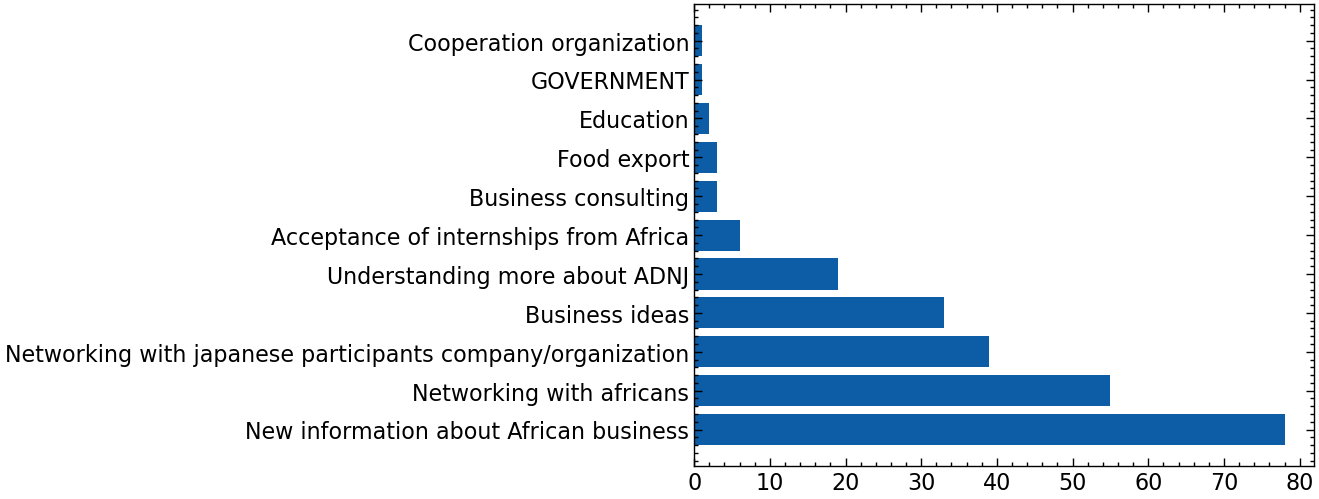

In [19]:
name = ['New information about African business', 'Networking with africans', 'Networking with japanese participants company/organization', 'Business ideas', 'Understanding more about ADNJ', 'Acceptance of internships from Africa', 'Business consulting', 'Food export', 'Education', 'GOVERNMENT', 'Cooperation organization' ]
plt.barh(name, data1.head(11))
#plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12499 (\N{KATAKANA LETTER BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\si

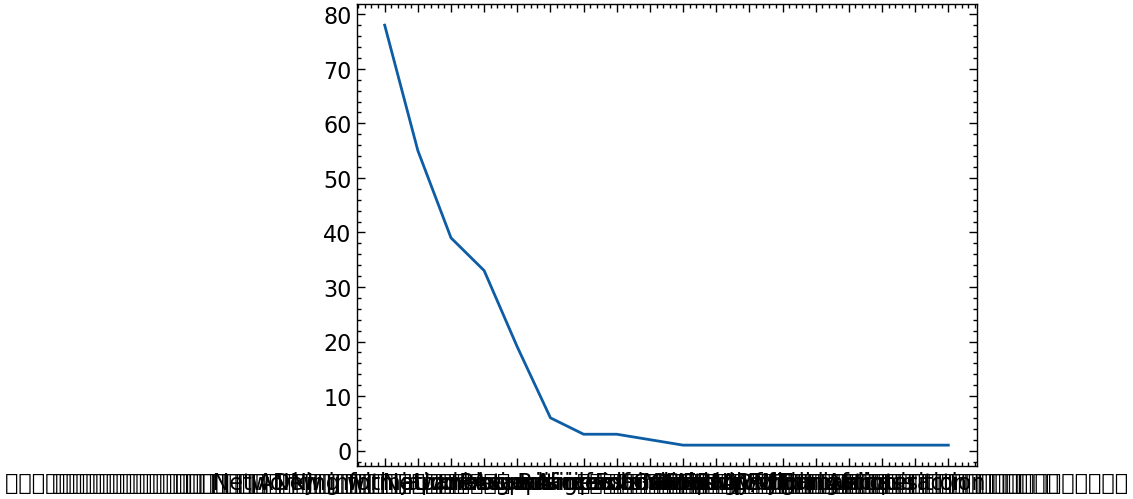

In [20]:

# Horizontal Bar Plot
plt.plot(data1)
 
# Show Plot
plt.show()

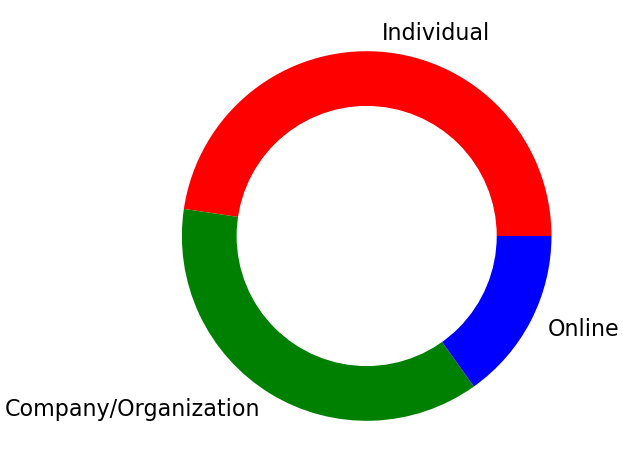

In [316]:
#data2 = df['種別'].value_counts().sort_values(ascending=False)
data = [173, 135, 55]
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

plt.pie(data, labels = ['Individual', 'Company/Organization', 'Online'], colors=['red','green', 'blue'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show() 

## Compare 2022 and 2023 without online participatants

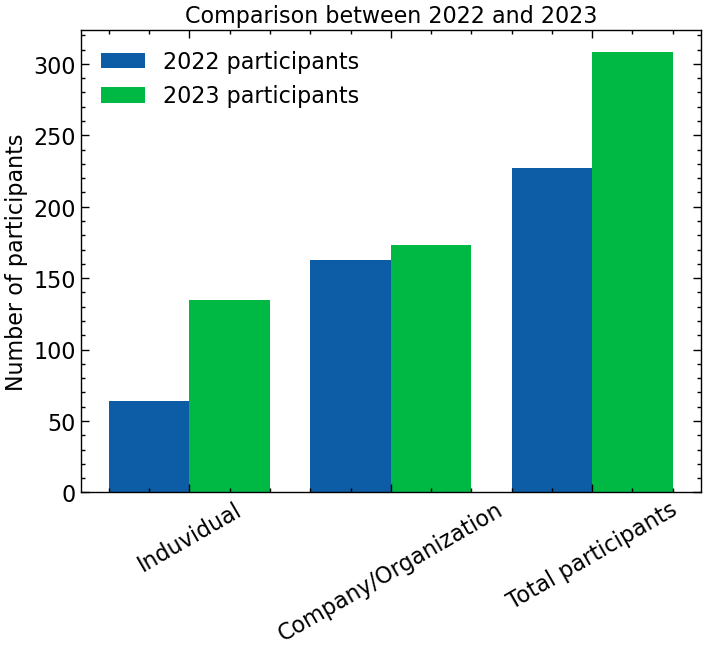

In [320]:
# grouped barplot

data1 = [64, 163, 227]
data2 = [135, 173, 308]

X = ['Induvidual','Company/Organization','Total participants']

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, data1, 0.4, label = '2022 participants')
plt.bar(X_axis + 0.2, data2, 0.4, label = '2023 participants')
  
plt.xticks(X_axis, X)
plt.xlabel("")
plt.ylabel("Number of participants")
plt.title("Comparison between 2022 and 2023")
plt.legend()
plt.xticks(rotation=30)
plt.show()

In [22]:
df['業種 Industry'].value_counts().sort_values(ascending=False)


コンサルティング Consulting                                                       38
製造業  Manufacturing                                                        33
農林水産業 Agriculture, Forestry and Fisheries                                 30
教育関係 Education                                                            23
IT関係 IT                                                                   18
食品関係 Food and bevarage, restaurant                                         9
金融業 Finance                                                                7
保健関係 Health                                                                6
デザイン・アート Design / Art                                                      6
学生                                                                         5
建築・土木業 Construction                                                        5
運送業 Transportation                                                         4
Exportation of goods                                                       4

In [23]:
 df['業種 Industry'].replace('仲介　販売　プランニング','コンサルティング Consulting', inplace=True)

In [24]:
 df['業種 Industry'].replace('Ph D student','Academia', inplace=True)

In [25]:
 df['業種 Industry'].replace('仲介　販売　プランニング','Retail', inplace=True)

In [26]:
 df['業種 Industry'].replace('Consulate ','コンサルティング Consulting', inplace=True)

In [33]:
 df['業種 Industry'].replace('TEAM EXPO 2025プログラム共創チャレンジチーム','TEAM EXPO 2025', inplace=True)

In [34]:
 df['業種 Industry'].replace('TEAM EXPO 2025','Government', inplace=True)

In [35]:
 df['業種 Industry'].replace('奉仕団体','Association', inplace=True)

In [36]:
 df['業種 Industry'].replace('団体','Association', inplace=True)

In [71]:
 df['業種 Industry'].replace('団体職員','Association', inplace=True)

In [72]:
 df['業種 Industry'].replace('学生','教育関係 Education', inplace=True)

In [73]:
 df['業種 Industry'].replace('学生','教育関係 Education', inplace=True)

In [89]:
 df['業種 Industry'].replace('Incubation for startups and business advisor','Entrepreneurship', inplace=True)

In [157]:
 df['業種 Industry'].replace('公益社団法人','食品関係 Food and bevarage, restaurant', inplace=True)

In [168]:
 df['業種 Industry'].replace('食品関係','食品関係 Food and bevarage, restaurant', inplace=True)

In [169]:
 df['業種 Industry'].replace('UNDP','International organisation', inplace=True)

In [170]:
data3 = df['業種 Industry'].value_counts().sort_values(ascending=False)

In [171]:
data3

コンサルティング Consulting                                                       43
製造業  Manufacturing                                                        36
教育関係 Education                                                            31
農林水産業 Agriculture, Forestry and Fisheries                                 30
IT関係 IT                                                                   18
食品関係 Food and bevarage, restaurant                                        10
Retail                                                                     8
金融業 Finance                                                                7
デザイン・アート Design / Art                                                      6
保健関係 Health                                                                6
Association                                                                6
Exportation of goods                                                       5
建築・土木業 Construction                                                        5

NameError: name 'addlabels' is not defined

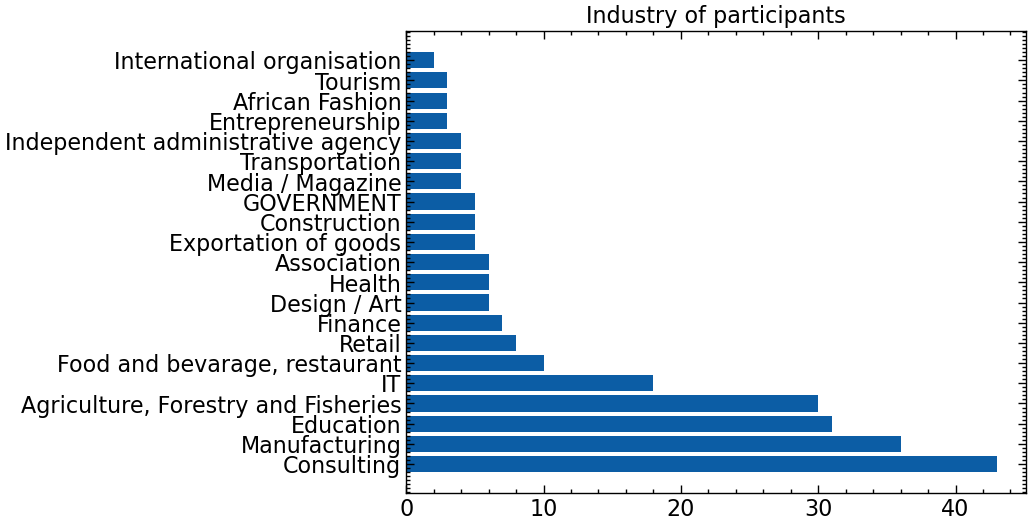

In [180]:
import matplotlib.pyplot as plt
name = ['Consulting', 'Manufacturing', 'Education', 'Agriculture, Forestry and Fisheries', 'IT', 'Food and bevarage, restaurant', 'Retail', 'Finance', 'Design / Art', 'Health', 'Association', 'Exportation of goods', 'Construction', 'GOVERNMENT', 'Media / Magazine', 'Transportation', 'Independent administrative agency', 'Entrepreneurship', 'African Fashion', 'Tourism', 'International organisation']
plt.barh(name, data3.head(21))
#addlabels(name, data3.head(21))
# giving title to the plot
plt.title("Industry of participants")
addlabels(name, data3.head(21))
plt.show()

In [173]:
df['業種 Industry'].head()

0                               教育関係 Education
1                                  保健関係 Health
2                          コンサルティング Consulting
3                   出版社・メディア  Media / Magazine
4    農林水産業 Agriculture, Forestry and Fisheries
Name: 業種 Industry, dtype: object

In [181]:
data4 = df['Experience in Africa'].value_counts().sort_values(ascending=False)


In [183]:
data4

アフリカビジネスの可能性を考え始めたばかり Just starting to think about the possibilities for African business.                                                  57
現在アフリカビジネス調査中である We are under the reserch                                                                                                   51
すでにアフリカでビジネスを展開している We have already started business                                                                                        50
海外展開の可能性を考え始めたばかりで地域は限定していない   We are just starting to consider the possibility of overseas expansion and are not limited to any region.    27
アフリカビジネスは開始していないがその他地域への海外展開をしている Not yet in Africa, but already expanding business overseas in other regions                               15
支援機関                                                                                                                                         4
経験はない                                                                                                                                        2

In [219]:
 df['Experience in Africa'].replace('ないです','No experience', inplace=True)

In [264]:
 df['Experience in Africa'].replace('今後自治体とアフリカを繋ぐ国際交流を推進していきたい','GOVERNMENT and Embassy', inplace=True)

In [265]:
data4 = df['Experience in Africa'].value_counts().sort_values(ascending=False)
data4

アフリカビジネスの可能性を考え始めたばかり Just starting to think about the possibilities for African business.                                                  59
すでにアフリカでビジネスを展開している We have already started business                                                                                        53
現在アフリカビジネス調査中である We are under the reserch                                                                                                   51
海外展開の可能性を考え始めたばかりで地域は限定していない   We are just starting to consider the possibility of overseas expansion and are not limited to any region.    27
アフリカビジネスは開始していないがその他地域への海外展開をしている Not yet in Africa, but already expanding business overseas in other regions                               15
No experience                                                                                                                               11
支援機関                                                                                                                                         8

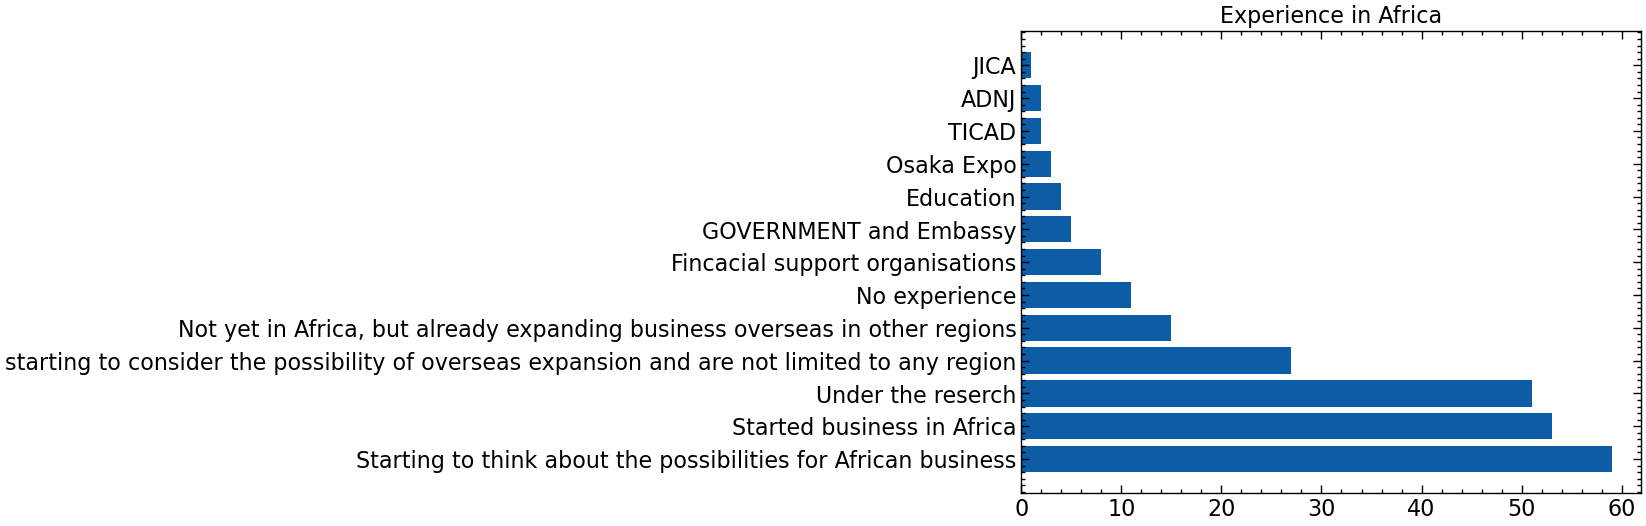

In [268]:
import matplotlib.pyplot as plt
name = ['Starting to think about the possibilities for African business', 'Started business in Africa', 'Under the reserch', 'starting to consider the possibility of overseas expansion and are not limited to any region', 'Not yet in Africa, but already expanding business overseas in other regions', 'No experience', 'Fincacial support organisations', 'GOVERNMENT and Embassy', 'Education', 'Osaka Expo', 'TICAD', 'ADNJ', 'JICA']
plt.barh(name, data4.head(13))
#addlabels(name, data3.head(21))
# giving title to the plot
plt.title("Experience in Africa")
#addlabels(name, data4.head(13))
plt.show()

In [269]:
data5 = df['Information from'].value_counts().sort_values(ascending=False)


In [293]:
#data5

In [305]:
 df['Information from'].replace("社内","知人からの紹介 From your friends", inplace=True)

In [306]:
 df['Information from'].replace('報道資料','新聞広告 Newspaper', inplace=True)

In [307]:
data5 = df['Information from'].value_counts().sort_values(ascending=False)
data5

知人からの紹介 From your friends                  56
イベント関係者からの紹介 From one of the organizers    43
ADNJ からのメール Email from ADNJ                34
Facebook                                   25
JICAメーリングリスト                               15
UNDPメーリングリスト                               12
大阪商工会議所メーリングリスト                             9
Linked In                                   9
Instagram                                   8
中小機構 メーリングリスト                               6
新聞広告 Newspaper                              5
東大阪市役所                                      5
JETRO メーリングリスト                              4
東大阪商工会議所メーリングリスト                            3
twitter                                     3
Ethiopia                                    3
大阪商工会議所HP                                   1
UNIDO東京事務所からのメーリングリスト                       1
大阪市役所                                       1
オンラインニュース Online journal                    1
東京八芳園で開催された国際交流パビリオンにて（オンライン視聴）             1
ケニア、南アフリカ                         

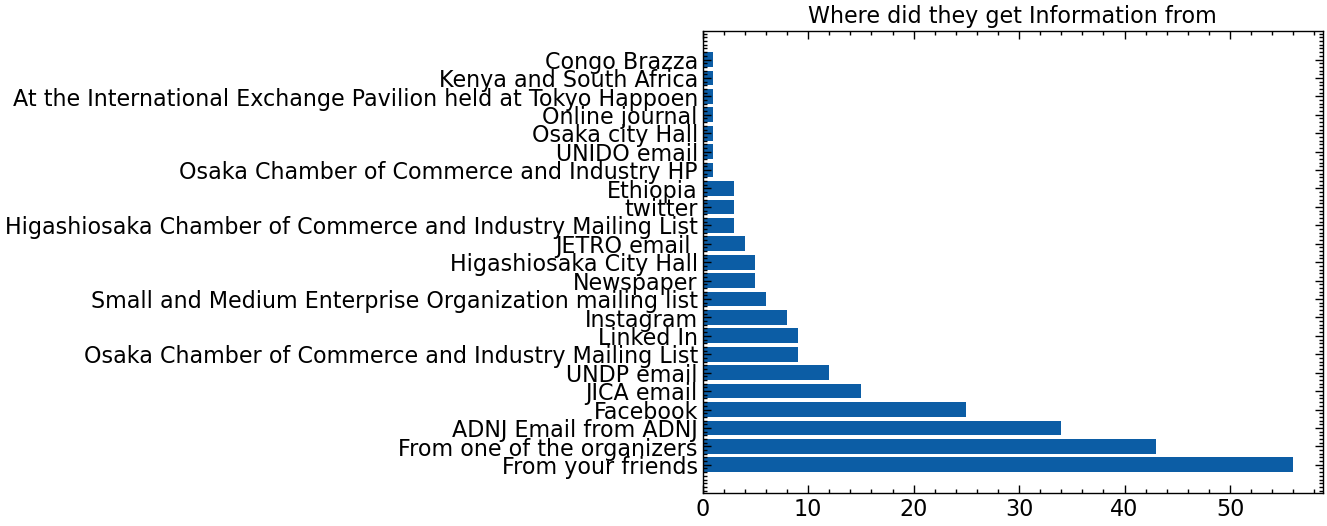

In [313]:
import matplotlib.pyplot as plt
name = ['From your friends', 'From one of the organizers', 'ADNJ Email from ADNJ', 'Facebook', 'JICA email', 'UNDP email', 'Osaka Chamber of Commerce and Industry Mailing List', 'Linked In', 'Instagram', 'Small and Medium Enterprise Organization mailing list', 'Newspaper', 'Higashiosaka City Hall', 'JETRO email ', 'Higashiosaka Chamber of Commerce and Industry Mailing List', 'twitter', 'Ethiopia', 'Osaka Chamber of Commerce and Industry HP', 'UNIDO email', 'Osaka city Hall', 'Online journal', 'At the International Exchange Pavilion held at Tokyo Happoen', 'Kenya and South Africa', 'Congo Brazza']
plt.barh(name, data5)
#addlabels(name, data3.head(21))
# giving title to the plot
plt.title("Where did they get Information from")
#addlabels(name, data4.head(13))
plt.show()